# Part 1: Obtaining the Data

In [92]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import seaborn as sns
from numpy import array
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
from sklearn.neighbors import KNeighborsRegressor
import mglearn.plots

In [43]:
#Read the dataset csv file and store our dataset into a dataframe called "data" an naming the columns

data = pd.read_csv('data_knn.csv', header = None)
data.columns = ["a", "b", "c", "d", "label"]
data

,a,b,c,d,label
0,5.1,3.5,1.4,0.2,A
1,4.9,3.0,1.4,0.2,A
2,4.7,3.2,1.3,0.2,A
3,4.6,3.1,1.5,0.2,A
4,5.0,3.6,1.4,0.2,A
5,5.4,3.9,1.7,0.4,A
6,4.6,3.4,1.4,0.3,A
7,5.0,3.4,1.5,0.2,A
8,4.4,2.9,1.4,0.2,A
9,4.9,3.1,1.5,0.1,A


# Part 2: Scrubbing the Data

Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset is super clean and contains no missing values. But still, I will have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.

In [44]:
# Checking information related to the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
a        150 non-null float64
b        150 non-null float64
c        150 non-null float64
d        150 non-null float64
label    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [45]:
# Check to see if there are any missing values in our data set
data.isnull().any()

a        False
b        False
c        False
d        False
label    False
dtype: bool

In [46]:
# Get a quick overview of what we are dealing with in our dataset
data.head()

,a,b,c,d,label
0,5.1,3.5,1.4,0.2,A
1,4.9,3.0,1.4,0.2,A
2,4.7,3.2,1.3,0.2,A
3,4.6,3.1,1.5,0.2,A
4,5.0,3.6,1.4,0.2,A


In [47]:
# Removing the Target Column from the Training set
data_label = data.iloc[:, -1]

data_features = data.iloc[:, :-1]
 
data_label

0      A
1      A
2      A
3      A
4      A
5      A
6      A
7      A
8      A
9      A
10     A
11     A
12     A
13     A
14     A
15     A
16     A
17     A
18     A
19     A
20     A
21     A
22     A
23     A
24     A
25     A
26     A
27     A
28     A
29     A
      ..
120    C
121    C
122    C
123    C
124    C
125    C
126    C
127    C
128    C
129    C
130    C
131    C
132    C
133    C
134    C
135    C
136    C
137    C
138    C
139    C
140    C
141    C
142    C
143    C
144    C
145    C
146    C
147    C
148    C
149    C
Name: label, Length: 150, dtype: object

# Part 3: Exploring the Data

## 3a. Statistical Overview

#### The dataset has:

    About 150 observations and 5 features
    The feature a had a mean of 5.85 and max value of 7.9
    Standard deviation of feature c is 1.764


In [48]:
# Dimension of the data
data.shape

(150, 5)

In [49]:
# Check the type of our features. 
data.dtypes

a        float64
b        float64
c        float64
d        float64
label     object
dtype: object

In [50]:
# Display the statistical overview of the dataset

display(data_features.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
a,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
b,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
c,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
d,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [51]:
# checking the number of samples, and of each label
print (data['label'].count())
print (data['label'].value_counts())

#This data is a balanced dataset as the number of data points for every class is 50.

150
C    50
A    50
B    50
Name: label, dtype: int64


## 3b. Univariate Analysis

### Box Plots

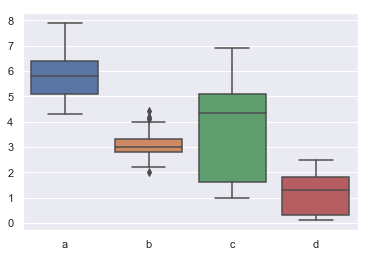

In [52]:
# Box Plots

sns.boxplot(data = data_features)

In [15]:
# There are outliers in the feature 'b'

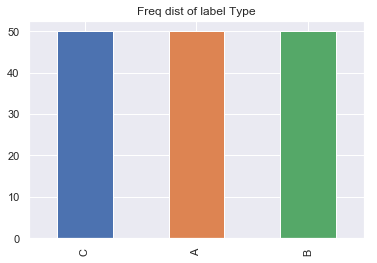

In [53]:
# Frequency Distribution of labels
data['label'].value_counts().plot.bar(title="Freq dist of label Type")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B85E6F0E48>,
      dtype=object)

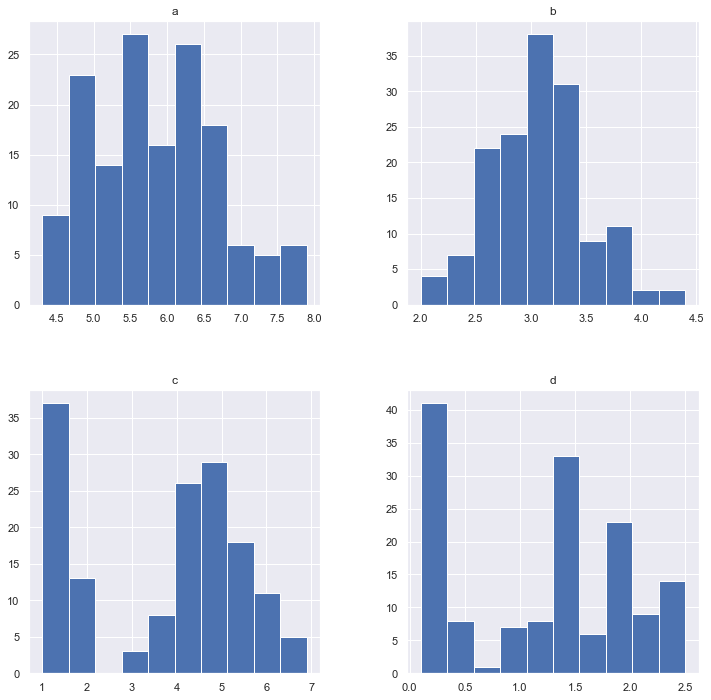

In [54]:
# Histogram frequency distribution for continous data
data.hist(figsize=(12,12))

## Multivariate Analysis

### Scatterplot Matrix 

A scatter plot is a two-dimensional data visualization technique that uses dots to represent the values obtained for two different variables – one plotted along the x-axis and the other plotted along the y-axis.

c:\users\ebhavaniprasad\pycharmprojects\test\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


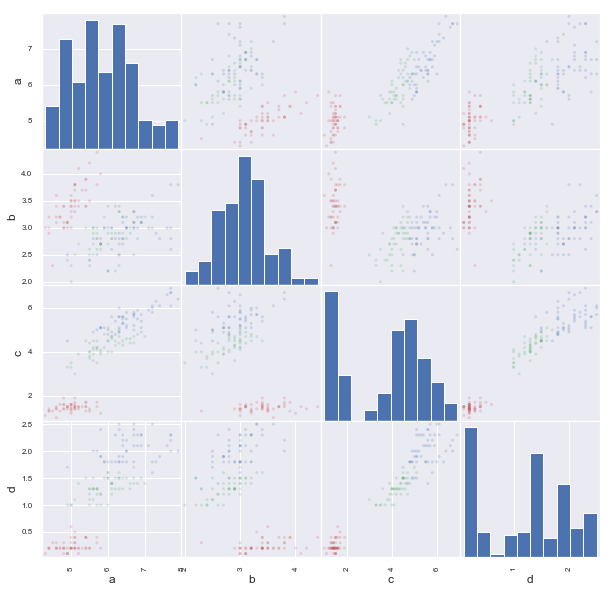

In [55]:
colors=array(50*['r']+50*['g']+50*['b'])
scatter_matrix(data, alpha=0.2, figsize=(10,10), color=colors)
plt.show()

Above are examples of scatter plots made using Matplotlib. We can observe that there is a linear relationship between c and d. However, with increase in a, the b does not increase proportionally – hence they do 
not have a linear relationship.

In a scatter plot, if the points are color-coded, an additional variable can be displayed. Each label has unique color.

### Pairplot

### Kernel density estimation

The kernel density estimate may be less familiar, but is a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on x axis with height along the y axis:

c:\users\ebhavaniprasad\pycharmprojects\test\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


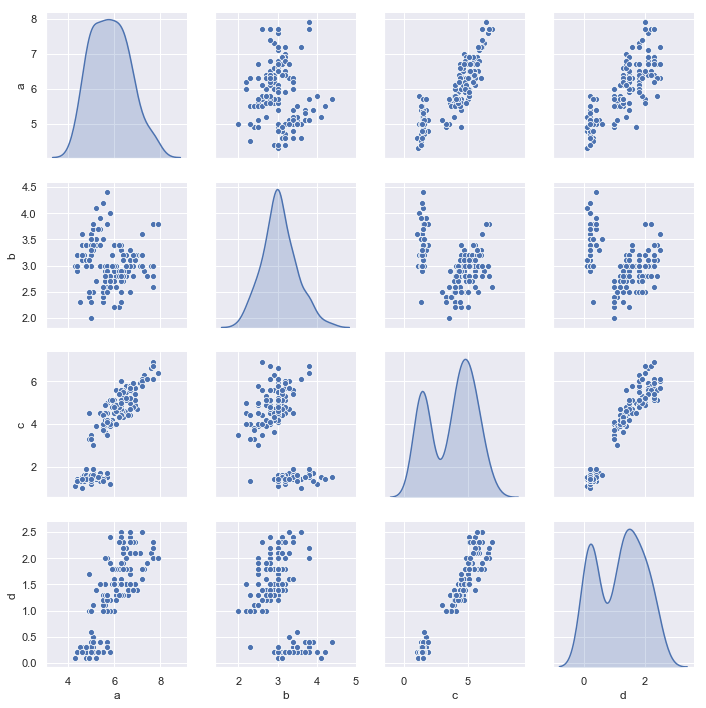

In [56]:
import seaborn as sns
sns.set()

sns.pairplot(data, diag_kind="kde")

### Heatmap 

Each intersection shows pairwise correlation of columns

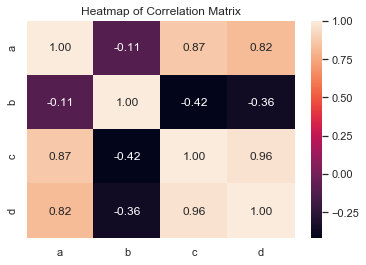

In [57]:
plt.title('Heatmap of Correlation Matrix')
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

### Conclusion: 
EDA is a crucial step to take before diving into machine learning or statistical modeling because it provides the context needed to develop an appropriate model (in our case kNN) for the problem at hand and to correctly interpret its results. EDA is valuable to the data analyst/data scientist to make certain that the results we produce are valid, correctly interpreted, and applicable to the desired business contexts.

## Part 4: Modeling the Data

## K-Nearest Neighbours (KNN)

In Machine Learning, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression problems. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression.

In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors. k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

In [68]:
# split data into training and test sets; set random state to 0 for reproducibility 
X_train, X_test, y_train, y_test = train_test_split(data[['a', 'b', 
                                                        'c', 'd']],
                                                    data['label'], random_state=0)

In [69]:
# see how data has been split
print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [198]:
# KNN using Scikit learn 

def KNNalgo(X_train, y_train, X_test, y_test, distance):
    metric = distance
    # initialize the Estimator object
    knn = KNeighborsClassifier(n_neighbors=4, metric = metric)
    # fit the model to training set in order to predict classes
    knn.fit(X_train, y_train)
    
    # create a prediction array for our test set
    y_pred = knn.predict(X_test)
    
    # based on the training dataset, our model predicts the following for the test set:
    new_df = pd.concat([X_test, y_test, pd.Series(y_pred, name='Predicted', index=X_test.index)], 
          ignore_index=False, axis=1)
    
    training_accuracy = knn.score(X_train, y_train)
    test_accuracy     = knn.score(X_test, y_test)    
    
    return training_accuracy, test_accuracy, new_df
  

In [199]:
# Metrics intended for real-valued vector spaces
distances_measures = ['euclidean','minkowski', 'cosine', 'manhattan', 'chebyshev', 'hamming']
train_acc_list = []
test_acc_list = []
new_df_list = []
for i, dist in enumerate(distances_measures):
    training_accuracy, test_accuracy, new_df = KNNalgo(X_train, y_train, X_test, y_test, dist)
    train_acc_list.append(training_accuracy)
    test_acc_list.append(test_accuracy)
    new_df_list.append(new_df)
     
#training_accuracy, test_accuracy, new_df = KNNalgo(X_train, y_train, X_test, y_test, 'euclidean')

print(train_acc_list, '\n')
print(test_acc_list, '\n')

for j in range(len(new_df_list)):
    print('Predictions after using ',distances_measures[j], 'distance metric')
    print(new_df_list[j])
    print('\n')
    print('Training Accuracy for ',distances_measures[j], 'distance metric is : ', train_acc_list[j], '\n')
    print('Test Accuracy for ',distances_measures[j], 'distance metric is : ', test_acc_list[j], '\n')
    
    print('\n')

[0.9732142857142857, 0.9732142857142857, 0.9821428571428571, 0.9642857142857143, 0.9642857142857143, 0.7946428571428571] 

[0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.7105263157894737] 

Predictions after using  euclidean distance metric
       a    b    c    d label Predicted
114  5.8  2.8  5.1  2.4     C         C
62   6.0  2.2  4.0  1.0     B         B
33   5.5  4.2  1.4  0.2     A         A
107  7.3  2.9  6.3  1.8     C         C
7    5.0  3.4  1.5  0.2     A         A
100  6.3  3.3  6.0  2.5     C         C
40   5.0  3.5  1.3  0.3     A         A
86   6.7  3.1  4.7  1.5     B         B
76   6.8  2.8  4.8  1.4     B         B
71   6.1  2.8  4.0  1.3     B         B
134  6.1  2.6  5.6  1.4     C         C
51   6.4  3.2  4.5  1.5     B         B
73   6.1  2.8  4.7  1.2     B         B
54   6.5  2.8  4.6  1.5     B         B
63   6.1  2.9  4.7  1.4     B         B
37   4.9  3.1  1.5  0.1     A         A
78   6.0  2.9  4.5  1.5

###  What is our score?


In [29]:
# what is our score?
print("Accuracy on Training set : {:.2f}".format(training_accuracy))
print("Accuracy on Test set : {:.2f}".format(test_accuracy))

Accuracy on Training set : 1.00
Accuracy on Test set : 0.97


## Data Normalization

    Here I'm normalizing the data so it rescales the real valued numeric attributes into the range 0 and 1.

It is critical to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in k-nearest neighbors and in the preparation of coefficients in regression.

In [72]:
# rescaling all data attributes into a range of 0 and 1.
normalized_X = preprocessing.normalize(data_features)
normalized_X

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [73]:
# Other data normalization method 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features)
scaled_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### Normalized DataFrame

In [32]:
df = pd.DataFrame(normalized_X,
...                 columns=['a', 'b', 'c', 'd'])

In [33]:
normalized_data = df.join(data_label)
normalized_data.head()

,a,b,c,d,label
0,0.803773,0.551609,0.220644,0.031521,A
1,0.828133,0.507020,0.236609,0.033801,A
2,0.805333,0.548312,0.222752,0.034269,A
3,0.800030,0.539151,0.260879,0.034784,A
4,0.790965,0.569495,0.221470,0.031639,A


In [74]:
# split data into training and test sets; set random state to 0 for reproducibility 
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(normalized_data[['a', 'b', 
                                                        'c', 'd']],
                                                    normalized_data['label'], stratify=normalized_data['label'], random_state=42)

In [75]:
# Let's see how normalized data has been split
print("X_train shape: {}\ny_train shape: {}".format(X_train_norm.shape, y_train_norm.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test_norm.shape, y_test_norm.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [77]:
training_accuracy_norm, test_accuracy_norm, new_df_norm = KNNalgo(X_train_norm, y_train_norm, X_test_norm, y_test_norm, 'euclidean')
new_df_norm

,a,b,c,d,label,Predicted
42,0.786090,0.571702,0.232254,0.035731,A,A
56,0.726348,0.380468,0.541879,0.184469,B,B
99,0.743148,0.365055,0.534545,0.169490,B,B
53,0.753849,0.315246,0.548254,0.178183,B,B
38,0.802124,0.546903,0.236991,0.036460,A,A
85,0.715249,0.405308,0.536437,0.190733,B,B
134,0.693854,0.295741,0.636981,0.159245,C,C
141,0.733379,0.329489,0.542063,0.244460,C,C
107,0.713666,0.283511,0.615903,0.175972,C,C
132,0.694177,0.303703,0.607405,0.238624,C,C


### What is our score after normalizing the data attributes?


In [78]:
# what is our score on normalized data?
print("Accuracy on Training set : {:.2f}".format(training_accuracy_norm))
print("Accuracy on Test set : {:.2f}".format(test_accuracy_norm))

Accuracy on Training set : 1.00
Accuracy on Test set : 0.97


# Performance Metrics 

## Confusion Matrix 

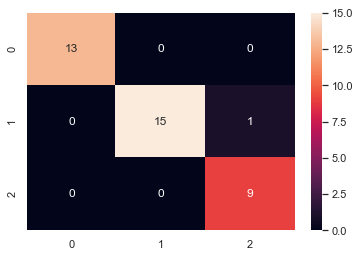

c:\users\ebhavaniprasad\pycharmprojects\test\venv\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
c:\users\ebhavaniprasad\pycharmprojects\test\venv\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


Confusion Matrix:

Predicted   A   B   C  __all__
Actual                        
A          13   0   0       13
B           0  15   1       16
C           0   0   9        9
__all__    13  15  10       38


Overall Statistics:

Accuracy: 0.9736842105263158
95% CI: (0.8619009702075799, 0.9993339637957976)
No Information Rate: ToDo
P-Value [Acc > NIR]: 2.7070836421172562e-14
Kappa: 0.9597883597883599
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       A          B          C
Population                                   38         38         38
P: Condition positive                        13         16          9
N: Condition negative                        25         22         29
Test outcome positive                        13         15         10
Test outcome negative                        25         23         28
TP: True Positive                            13         15          9
TN: True Negative                            25         22

c:\users\ebhavaniprasad\pycharmprojects\test\venv\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:344: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)


In [79]:
# confusion matrix before normalization
cm = confusion_matrix(new_df['label'], new_df['Predicted'])
sns.heatmap(cm,annot=True)
plt.savefig('knn_original.png')
plt.show()
cm1 = ConfusionMatrix(new_df['label'], new_df['Predicted'])
cm1.print_stats()

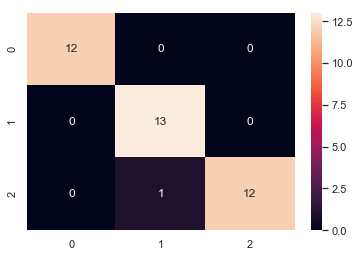

Confusion Matrix:

Predicted   A   B   C  __all__
Actual                        
A          12   0   0       12
B           0  13   0       13
C           0   1  12       13
__all__    12  14  12       38


Overall Statistics:

Accuracy: 0.9736842105263158
95% CI: (0.8619009702075799, 0.9993339637957976)
No Information Rate: ToDo
P-Value [Acc > NIR]: 2.1956930910775002e-15
Kappa: 0.9604989604989607
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       A          B          C
Population                                   38         38         38
P: Condition positive                        12         13         13
N: Condition negative                        26         25         25
Test outcome positive                        12         14         12
Test outcome negative                        26         24         26
TP: True Positive                            12         13         12
TN: True Negative                            26         24

In [80]:
#confusion matrix after normalization 
cm = confusion_matrix(new_df_norm['label'], new_df_norm['Predicted'])
sns.heatmap(cm,annot=True)
plt.savefig('knn_norm.png')
plt.show()
cm2 = ConfusionMatrix(new_df_norm['label'], new_df_norm['Predicted'])
cm2.print_stats()


### Distances Measure

In [83]:
# Euclidean distance: 
# Manhattan distance: 
# Minkowski distance:
# City-block distance:
# Cosine distance


In [84]:
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

import operator 
def getKNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors




In [85]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [[5, 5, 5]]
k = 1
neighbors = getKNeighbors(trainSet, testInstance, 1)
print(neighbors)

[[2, 2, 2, 'a']]


c:\users\ebhavaniprasad\pycharmprojects\test\venv\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
c:\users\ebhavaniprasad\pycharmprojects\test\venv\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


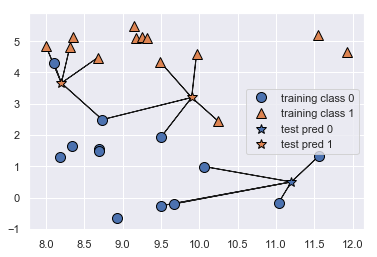

In [120]:
X, y = mglearn.datasets.make_forge()

mglearn.plots.plot_knn_classification(n_neighbors=5)
plt.show()


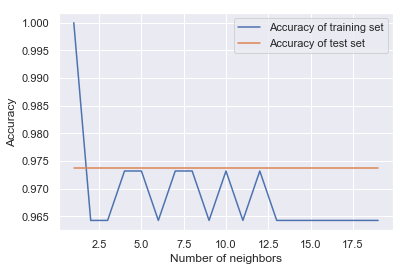

In [121]:
train_accuracy = []
test_accuracy = []
neighbors = range(1, 20)

for i in neighbors:
    clf  = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors, train_accuracy, label = 'Accuracy of training set')
plt.plot(neighbors, test_accuracy, label = 'Accuracy of test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()


### Pseudo Code of KNN

1. Preparing data
2. Initialize value of k
3. For getting predicted class for the test instance- iterate the training data from 1 to len(training_data):
      step 1 : Find the distance between the test instance and each row of the training data. (distance metric: Euclidean, Cosine, Manhattan, City-block, Minkowski)
      step 2 : Sort the distance in ascending order
      step 3 : Select top k rows in sorted array
      step 4 : Take the most frequent class label of the top k rows
      step 5 : Return frequent class as predicted class for the test instance


In [122]:
import numpy as np
# Similarity between data instances - Euclidean
def euclidean_metric(X_train, test_instance, col):
    distance = 0
    for i in range(col):
        distance += np.square(X_train[i]-test_instance[i])
    return np.sqrt(distance)
    
def knnPrediction(X_train, test_instance, k):
    distances = {}
    sort = {}
    col = test_instance.shape[1]
    
    for i in range(len(X_train)):
        dist = euclidean_metric(X_train.iloc[i], test_instance, col)
        distances[i] = dist[0]
        
    sort_dist = sorted(distances.items(), key=operator.itemgetter(1))   
    
    neighb = []
    
    for i in range(k):
        neighb.append(sort_dist[i][0])
        
    classvotes = {}
    
    for i in range(len(neighb)):
        c = X_train.iloc[neighb[i]][-1]
        
        if c in classvotes:
            classvotes[c] +=1
        else:
            classvotes[c] = 1
    sortedVotes = sorted(classvotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0], neighb
        


train_da = X_train.join(y_train)

test_instance = [[5.0, 3.4, 1.5, 0.2]]
test_instance = pd.DataFrame(test_instance)
k = 4
class_lab, neig = knnPrediction(train_da, test_instance, k)

print('For', test_instance.values.tolist(), 'nearest', k , 'analogous data instances are',  neig, 'and label is', class_lab)




For [[5.0, 3.4, 1.5, 0.2]] nearest 4 analogous data instances are [100, 87, 67, 61] and label is A


### Regression Using KNN

In [123]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label_en = le.fit(y_train)

In [150]:
label_en
list(le.classes_)
cont_labels = le.transform(data_label)
cont_labels = pd.DataFrame(cont_labels, columns= ['cont_label'])
result = data.join(cont_labels)
result.drop(['label'], axis=1)

,a,b,c,d,cont_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [152]:
# split data into training and test sets; set random state to 0 for reproducibility 
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(result[['a', 'b', 
                                                        'c', 'd']],
                                                    result['cont_label'], random_state=0)

# Let's see how normalized data has been split
print("X_train shape: {}\ny_train shape: {}".format(X_train_reg.shape, y_train_reg.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test_reg.shape, y_test_reg.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 4)
knn_reg.fit(X_train_reg, y_train_reg)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [171]:
predictions = knn_reg.predict(X_test_reg)
predictions = pd.DataFrame(predictions, columns= ['predictions'])
predictions

,predictions
0,2.00
1,1.00
2,0.00
3,2.00
4,0.00
5,2.00
6,0.00
7,1.00
8,1.00
9,1.00


In [129]:
print(data.iloc[100])
print(data.iloc[87])
print(data.iloc[67])
print(data.iloc[61])


a        6.3
b        3.3
c          6
d        2.5
label      C
Name: 100, dtype: object
a        6.3
b        2.3
c        4.4
d        1.3
label      B
Name: 87, dtype: object
a        5.8
b        2.7
c        4.1
d          1
label      B
Name: 67, dtype: object
a        5.9
b          3
c        4.2
d        1.5
label      B
Name: 61, dtype: object


# Thank You